In [6]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import rstoolbox
import pandas as pd
import seaborn as sns
import numpy as np
import copy

sns.set(font_scale=1.5)

# RMSD derivation in all alpha helix NMR structures

In this _scoring benchmark_ we will assess how much all alpha helical proteins vary between themselves by analyzing 6 different cases. For each analysed protein, the __global RMSD__ is measured for alhpa-helical regions together with several __local RMSD__ (max. 3 different alignments per protein) by aligning a section in the center of the alpha helix. The search from which the _6 protein examples_ were extracted is sumarized in standard PDB database search [xml file](nmr_rmsd/search_params.xml).  

For each analyzed protein, there is a _selection script_ that defines the helical regions and the alignment regions and a _alignment script_ that, combined with a _run all python script_ will proceed to create all alignments.


In [4]:
def merge_rmsd_types( df, keys ):
    dataframes = []
    for k in keys["split"]:
        colIDs = copy.copy(keys["keep"])
        colIDs.append(k[0])
        wdf = df[colIDs]
        wdf = wdf.assign(temporarykey1=pd.Series([k[1]]*len(wdf[colIDs[0]])).values).copy(True)
        wdf = wdf.rename(index=str, columns={
            k[0]: keys["names"][0],
            "temporarykey1": keys["names"][1]
        })
        if ( len(k) > 2 ):
            wdf = wdf.assign(temporarykey2=pd.Series([k[2]]*len(wdf[colIDs[0]])).values).copy(True)
            wdf = wdf.rename(index=str, columns={
                "temporarykey2": keys["names"][2]
            })
        dataframes.append(wdf)
    return pd.concat(dataframes)

In [5]:
rmsd_example_proteins = ["1wa8", "1y74", "1y76", "2agh", "2drn", "2h35"]
rmsd_file_name        = "nmr_rmsd/{0}/rmsd_evaluation"
definition = {
    "scores":{
        "description": "description", "design_type": "source",
        "GlobalHRMSD": "GlobalHRMSD", "LocalHRMSD": "LocalHRMSD"
    }
}
logic = {
    "keep": ["description", "source"],
    "split": [("GlobalHRMSD", "global"), ("LocalHRMSD", "local") ],
    "names": ["rmsd", "rmsd_type"]
}
dataframes     = []
plotdataframes = []

for prot in rmsd_example_proteins:
    dlist = rstoolbox.api.read_rosetta_silent(rmsd_file_name.format(prot), prot, allow_repeats=True)
    df = rstoolbox.api.process_from_definitions(dlist, definition)
    dataframes.append(df)
    plotdataframes.append(merge_rmsd_types( df, logic ))

data  = pd.concat(dataframes)
pdata = pd.concat(plotdataframes) 


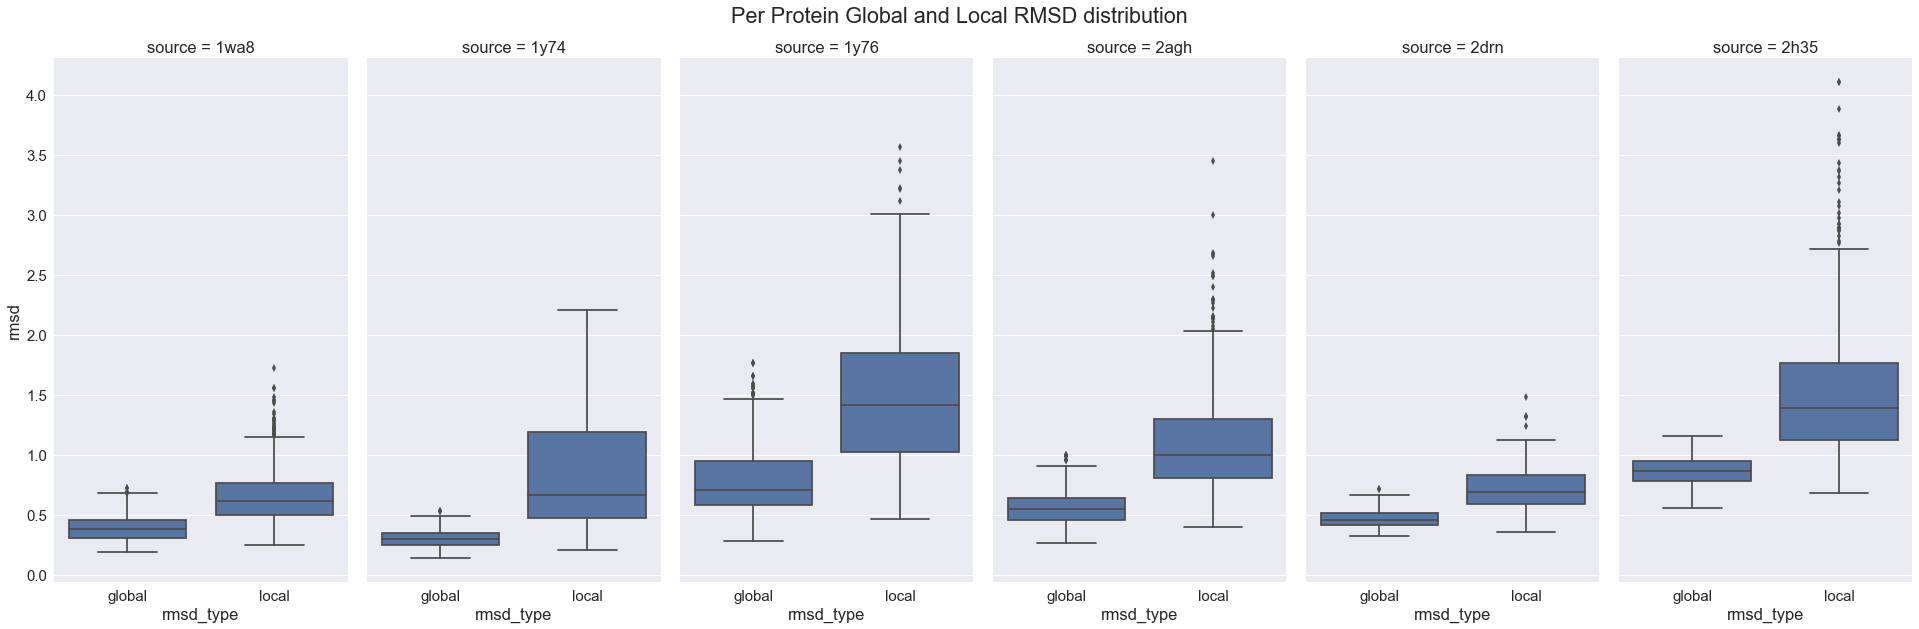

In [26]:
g = sns.FacetGrid(pdata, col="source", size=9, aspect=0.5)
g.map(sns.boxplot, "rmsd_type","rmsd" )
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Per Protein Global and Local RMSD distribution')
sns.plt.show()

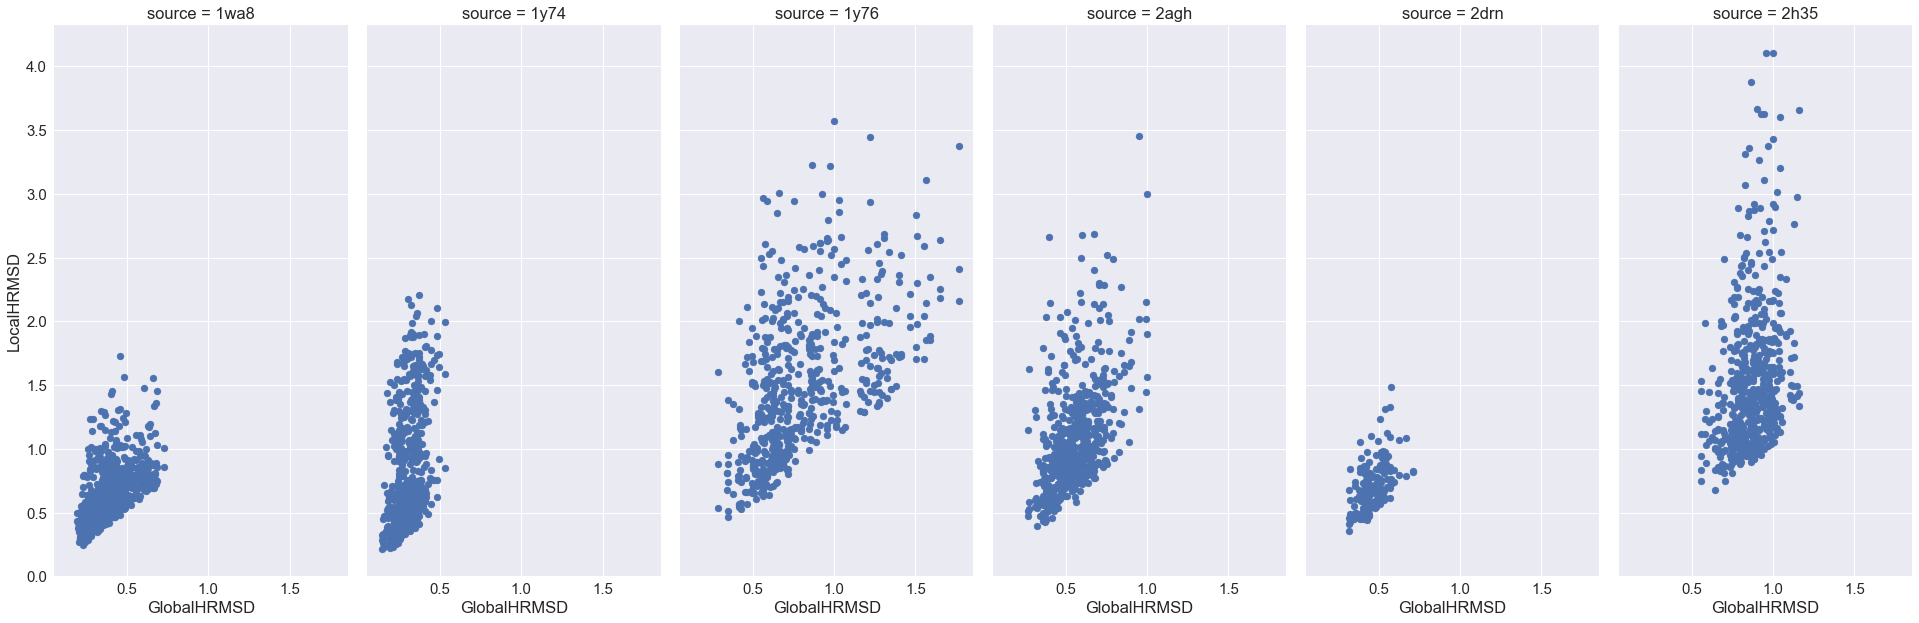

In [28]:
g = sns.FacetGrid(data, col="source", size=9, aspect=0.5)
g.map(plt.scatter, "GlobalHRMSD","LocalHRMSD" )
sns.plt.show()

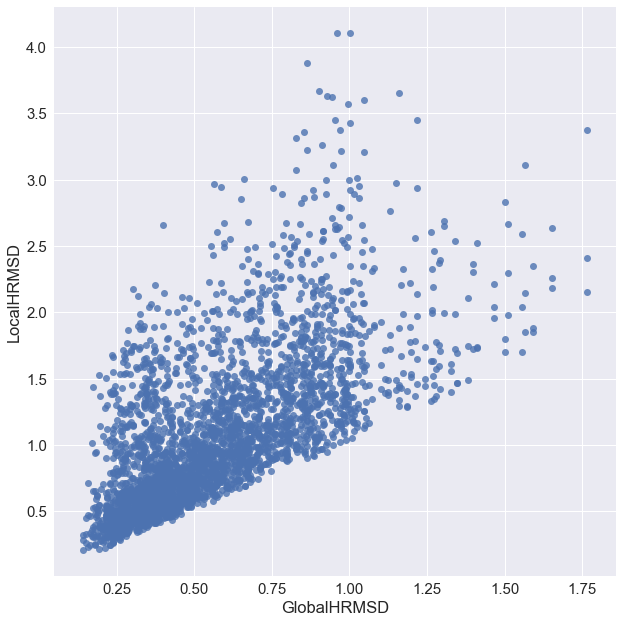

In [29]:
g = sns.lmplot(x="GlobalHRMSD", y="LocalHRMSD", data=data, fit_reg=False, size=9)
sns.plt.show()